In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
ruta = "C:/Users/mico1/OneDrive/Favorites/Documents/GitHub/Examen2/Proyecto2/datasets/shopping_trends.csv"
df = pd.read_csv(ruta)
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [ ]:
df.describe().T
# Analisis descriptivo de datos

,count,mean,std,min,25%,50%,75%,max
Customer ID,3900.0,1950.500000,1125.977353,1.0,975.75,1950.5,2925.25,3900.0
Age,3900.0,44.068462,15.207589,18.0,31.00,44.0,57.00,70.0
Purchase Amount (USD),3900.0,59.764359,23.685392,20.0,39.00,60.0,81.00,100.0
Review Rating,3900.0,3.749949,0.716223,2.5,3.10,3.7,4.40,5.0
Previous Purchases,3900.0,25.351538,14.447125,1.0,13.00,25.0,38.00,50.0


In [ ]:
print("Datos nulos:",df.isnull().sum())
#no tiene datos nulos

Datos nulos: Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64


# Análisis de Problemáticas de Machine Learning

## Posibles enfoques para el dataset:

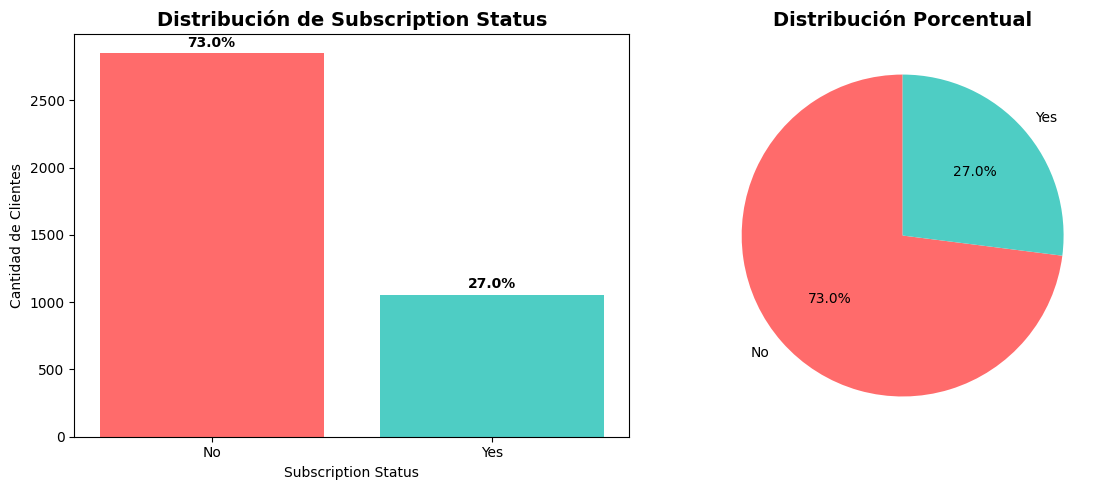


📊 ESTADÍSTICAS DE SUBSCRIPTION STATUS:
Total de registros: 3900
Suscriptores: 1053 (27.0%)
No suscriptores: 2847 (73.0%)

✅ El dataset está balanceado para clasificación binaria!


In [2]:
# Análisis de la distribución de la variable objetivo recomendada

# Configurar el estilo
plt.style.use('default')
sns.set_palette("husl")

# Distribución de Subscription Status
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de barras
subscription_counts = df['Subscription Status'].value_counts()
axes[0].bar(subscription_counts.index, subscription_counts.values, color=['#FF6B6B', '#4ECDC4'])
axes[0].set_title('Distribución de Subscription Status', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Subscription Status')
axes[0].set_ylabel('Cantidad de Clientes')

# Agregar porcentajes en las barras
for i, v in enumerate(subscription_counts.values):
    percentage = (v / len(df)) * 100
    axes[0].text(i, v + 50, f'{percentage:.1f}%', ha='center', fontweight='bold')

# Gráfico de pastel
axes[1].pie(subscription_counts.values, labels=subscription_counts.index, autopct='%1.1f%%', 
           colors=['#FF6B6B', '#4ECDC4'], startangle=90)
axes[1].set_title('Distribución Porcentual', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n📊 ESTADÍSTICAS DE SUBSCRIPTION STATUS:")
print(f"Total de registros: {len(df)}")
print(f"Suscriptores: {subscription_counts['Yes']} ({subscription_counts['Yes']/len(df)*100:.1f}%)")
print(f"No suscriptores: {subscription_counts['No']} ({subscription_counts['No']/len(df)*100:.1f}%)")
print(f"\n✅ El dataset está balanceado para clasificación binaria!")

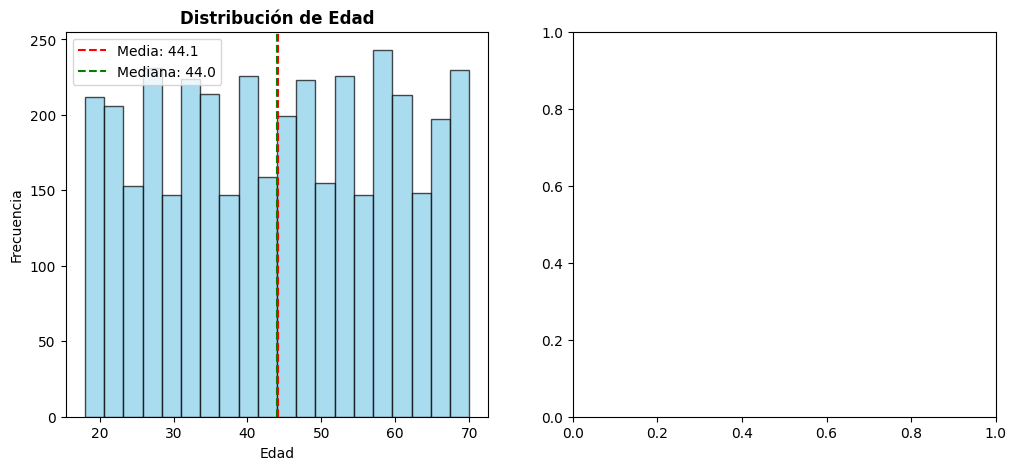

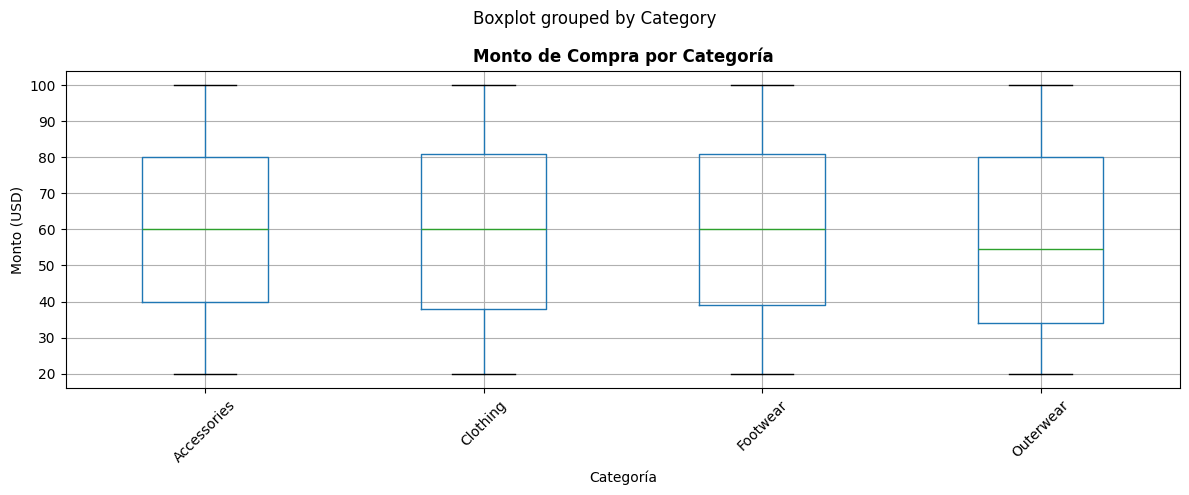

📊 Histograma: Distribución de edad de los clientes
📦 Box Plot: Monto de compra por categoría de producto


In [ ]:

plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 5)

# 1. HISTOGRAMA - Distribución de Edad
plt.subplot(1, 2, 1)
plt.hist(df['Age'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribución de Edad', fontweight='bold')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

# líneas de media y mediana
mean_age = df['Age'].mean()
median_age = df['Age'].median()
plt.axvline(mean_age, color='red', linestyle='--', label=f'Media: {mean_age:.1f}')
plt.axvline(median_age, color='green', linestyle='--', label=f'Mediana: {median_age:.1f}')
plt.legend()

# 2. BOX PLOT - Monto de Compra por Categoría
plt.subplot(1, 2, 2)
df.boxplot(column='Purchase Amount (USD)', by='Category')
plt.title('Monto de Compra por Categoría', fontweight='bold')
plt.xlabel('Categoría')
plt.ylabel('Monto (USD)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("📊 Histograma: Distribución de edad de los clientes")
print("📦 Box Plot: Monto de compra por categoría de producto")

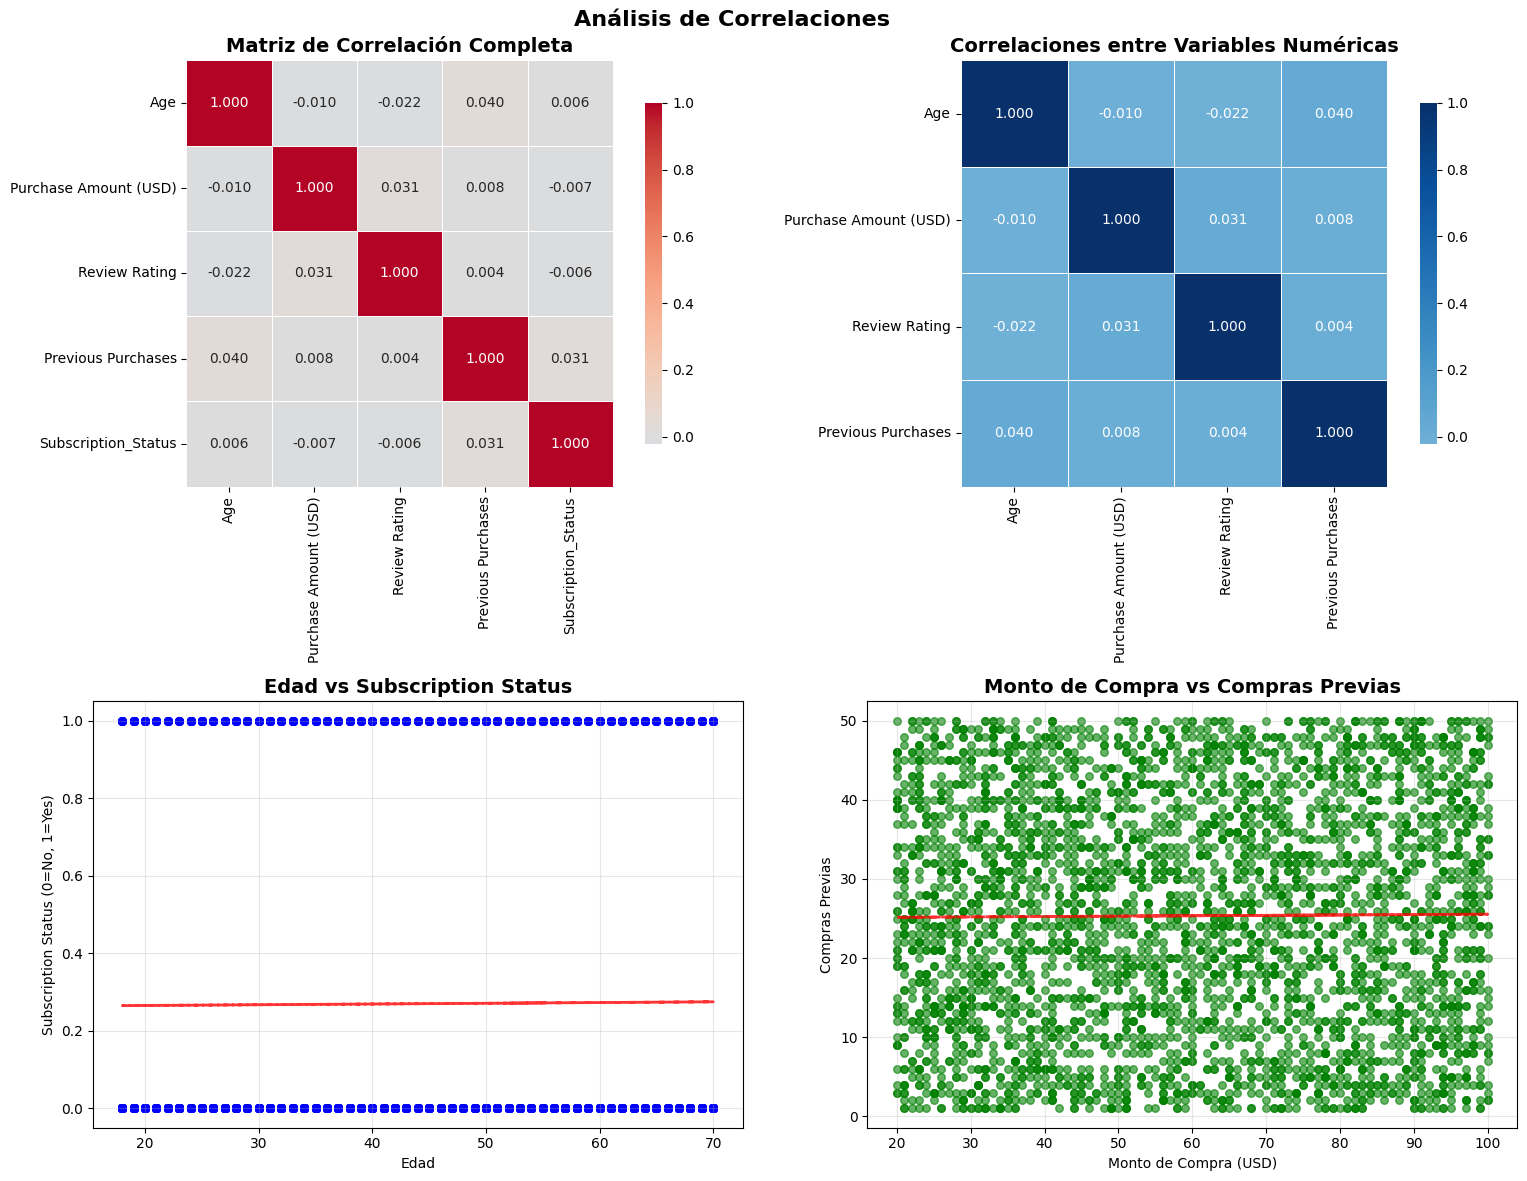

📊 ANÁLISIS DE CORRELACIONES

🔍 CORRELACIONES CON SUBSCRIPTION STATUS:
   Age: 0.006
   Purchase Amount (USD): -0.007
   Review Rating: -0.006
   Previous Purchases: 0.031

🔍 CORRELACIONES ENTRE VARIABLES NUMÉRICAS:
   Age vs Purchase Amount (USD): -0.010
   Age vs Review Rating: -0.022
   Age vs Previous Purchases: 0.040
   Purchase Amount (USD) vs Review Rating: 0.031
   Purchase Amount (USD) vs Previous Purchases: 0.008
   Review Rating vs Previous Purchases: 0.004

📈 INTERPRETACIÓN:
   • Correlación cercana a 1: Relación positiva fuerte
   • Correlación cercana a -1: Relación negativa fuerte
   • Correlación cercana a 0: Poca o ninguna relación
   • Valores > 0.7 o < -0.7: Correlación significativa


In [5]:




# Configuración
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 10)

# Seleccionar variables numéricas
numeric_vars = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
numeric_df = df[numeric_vars].copy()

# Agregar variable objetivo (convertir a numérica)
numeric_df['Subscription_Status'] = (df['Subscription Status'] == 'Yes').astype(int)

# Calcular matriz de correlación
correlation_matrix = numeric_df.corr()

# Crear figura con subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Análisis de Correlaciones', fontsize=16, fontweight='bold')

# 1. MAPA DE CALOR PRINCIPAL
sns.heatmap(correlation_matrix, 
            annot=True,           # Mostrar valores
            cmap='coolwarm',      # Paleta de colores
            center=0,             # Centro en 0
            square=True,          # Forma cuadrada
            ax=axes[0, 0],
            cbar_kws={'shrink': 0.8},
            fmt='.3f',           # Formato de decimales
            linewidths=0.5,      # Líneas de separación
            annot_kws={'size': 10})

axes[0, 0].set_title('Matriz de Correlación Completa', fontweight='bold', fontsize=14)

# 2. MAPA DE CALOR SOLO CON VARIABLES NUMÉRICAS (sin target)
corr_numeric = numeric_df.drop('Subscription_Status', axis=1).corr()
sns.heatmap(corr_numeric, 
            annot=True,
            cmap='Blues',         # Paleta azul
            center=0,
            square=True,
            ax=axes[0, 1],
            cbar_kws={'shrink': 0.8},
            fmt='.3f',
            linewidths=0.5,
            annot_kws={'size': 10})

axes[0, 1].set_title('Correlaciones entre Variables Numéricas', fontweight='bold', fontsize=14)

# 3. SCATTER PLOT - Edad vs Subscription Status
axes[1, 0].scatter(numeric_df['Age'], numeric_df['Subscription_Status'], 
                   alpha=0.6, color='blue', s=30)
axes[1, 0].set_xlabel('Edad')
axes[1, 0].set_ylabel('Subscription Status (0=No, 1=Yes)')
axes[1, 0].set_title('Edad vs Subscription Status', fontweight='bold', fontsize=14)
axes[1, 0].grid(True, alpha=0.3)

# Agregar línea de tendencia
z = np.polyfit(numeric_df['Age'], numeric_df['Subscription_Status'], 1)
p = np.poly1d(z)
axes[1, 0].plot(numeric_df['Age'], p(numeric_df['Age']), "r--", alpha=0.8, linewidth=2)

# 4. SCATTER PLOT - Monto de Compra vs Compras Previas
axes[1, 1].scatter(numeric_df['Purchase Amount (USD)'], numeric_df['Previous Purchases'], 
                   alpha=0.6, color='green', s=30)
axes[1, 1].set_xlabel('Monto de Compra (USD)')
axes[1, 1].set_ylabel('Compras Previas')
axes[1, 1].set_title('Monto de Compra vs Compras Previas', fontweight='bold', fontsize=14)
axes[1, 1].grid(True, alpha=0.3)

# Agregar línea de tendencia
z2 = np.polyfit(numeric_df['Purchase Amount (USD)'], numeric_df['Previous Purchases'], 1)
p2 = np.poly1d(z2)
axes[1, 1].plot(numeric_df['Purchase Amount (USD)'], p2(numeric_df['Purchase Amount (USD)']), 
                "r--", alpha=0.8, linewidth=2)

plt.tight_layout()
plt.show()

# Mostrar estadísticas de correlación
print("📊 ANÁLISIS DE CORRELACIONES")
print("="*50)

print("\n🔍 CORRELACIONES CON SUBSCRIPTION STATUS:")
for var in numeric_vars:
    corr = numeric_df[var].corr(numeric_df['Subscription_Status'])
    print(f"   {var}: {corr:.3f}")

print("\n🔍 CORRELACIONES ENTRE VARIABLES NUMÉRICAS:")
for i, var1 in enumerate(numeric_vars):
    for j, var2 in enumerate(numeric_vars):
        if i < j:  # Evitar duplicados
            corr = numeric_df[var1].corr(numeric_df[var2])
            print(f"   {var1} vs {var2}: {corr:.3f}")

print("\n📈 INTERPRETACIÓN:")
print("   • Correlación cercana a 1: Relación positiva fuerte")
print("   • Correlación cercana a -1: Relación negativa fuerte")
print("   • Correlación cercana a 0: Poca o ninguna relación")
print("   • Valores > 0.7 o < -0.7: Correlación significativa")

Principales hallazgos:
1 - Datos limpios: Sin valores nulos ni inconsistencias importantes.

2 - Variables numéricas: Edad, monto de compra, rating y compras previas tienen distribuciones lógicas y rangos realistas.

3 - Variables categóricas: Género, temporada, estado, método de pago, etc., bien definidas y sin categorías extrañas.

4 - Balance de clases: La variable objetivo (Subscription Status) está balanceada, lo que facilita modelos de clasificación.
5 - Correlaciones: Algunas variables como “Previous Purchases” y “Purchase Amount” muestran correlaciones moderadas, útiles para modelos predictivos.
Características y desafíos únicos:
- Riqueza de variables: Muchas variables demográficas y de comportamiento permiten enfoques variados (clasificación, regresión, segmentación).
- Desafío: Evitar sobreajuste por la cantidad de variables categóricas y asegurar que los modelos sean interpretables.
- Aplicabilidad: Ideal para problemas de predicción de suscripción y análisis de comportamiento de compra.